In [1]:
'''
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

'''

'\nPREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS\n\n'

In [4]:
#pip install scikeras

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [3]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [5]:
data=pd.read_csv("forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
data.shape

(517, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'dayfri'}>],
       [<Axes: title={'center': 'daymon'}>,
        <Axes: title={'center': 'daysat'}>,
        <Axes: title={'center': 'daysun'}>,
        <Axes: title={'center': 'daythu'}>,
        <Axes: title={'center': 'daytue'}>],
       [<Axes: title={'center': 'daywed'}>,
        <Axes: title={'center': 'monthapr'}>,
        <Axes: title={'center': 'monthaug'}>,
        <Axes: title={'center': 'monthdec'}>,
        <Axes: title={'center': 'monthfeb'}>],
       [<Axes: title={'center': 'monthjan'}>,
        <Axes: title={'center': 'monthjul'}>,
        <Axes: title={'center': 'monthjun'}>,
        <A

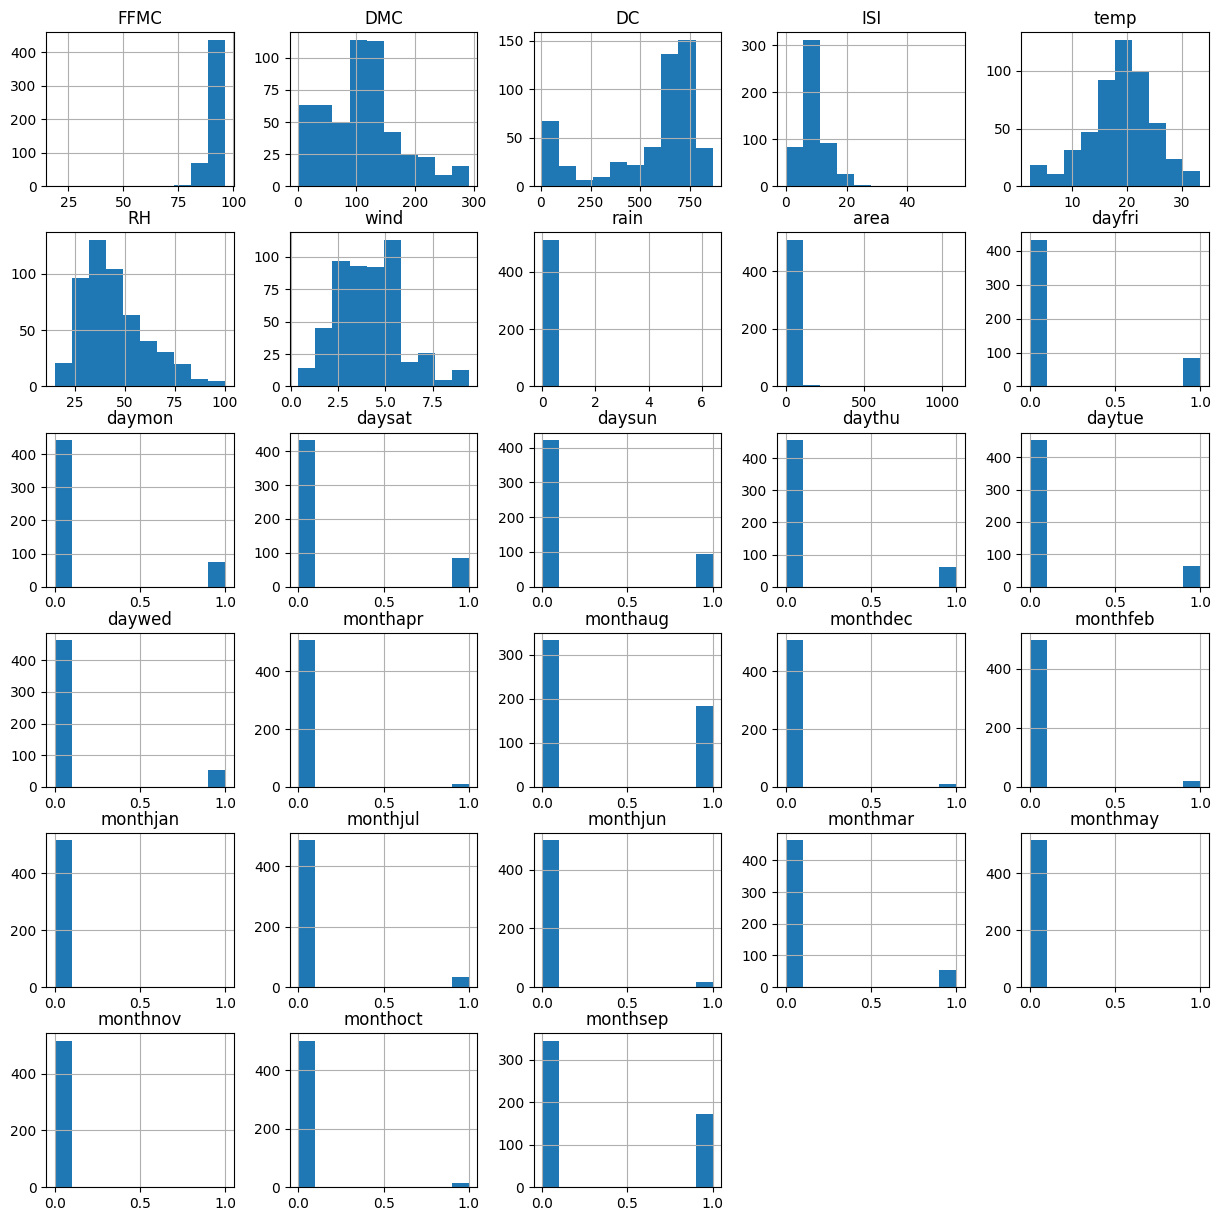

In [8]:
data.hist(figsize=(15,15), bins=10)

In [9]:
data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [10]:
#Missing Values

data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
#Duplicate Values

data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
data[data.duplicated()].shape

(8, 31)

In [13]:
# Dropping duplicate values

data1 = data.drop_duplicates().reset_index(drop=True)
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
data1[data1.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [15]:
data1=data1.drop(labels=['month','day'],axis = 1)
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


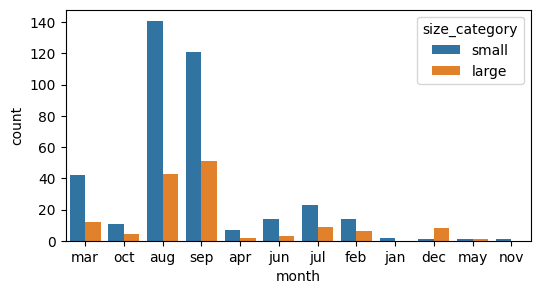

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(x =data['month'],hue=data['size_category'])
plt.show()

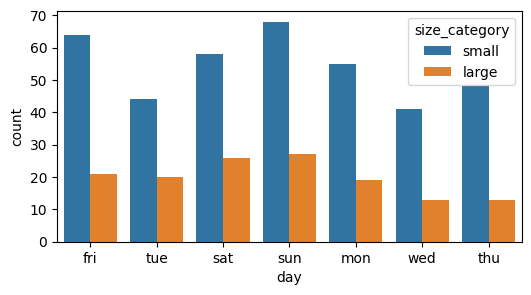

In [17]:
plt.figure(figsize=(6,3))
sns.countplot(x =data['day'],hue=data['size_category'])
plt.show()

In [18]:
# Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#data1["month"] = label_encoder.fit_transform(data1["month"])
#data1["day"] = label_encoder.fit_transform(data1["day"])
data1["size_category"] = label_encoder.fit_transform(data1["size_category"])

In [19]:
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           509 non-null    float64
 1   DMC            509 non-null    float64
 2   DC             509 non-null    float64
 3   ISI            509 non-null    float64
 4   temp           509 non-null    float64
 5   RH             509 non-null    int64  
 6   wind           509 non-null    float64
 7   rain           509 non-null    float64
 8   area           509 non-null    float64
 9   dayfri         509 non-null    int64  
 10  daymon         509 non-null    int64  
 11  daysat         509 non-null    int64  
 12  daysun         509 non-null    int64  
 13  daythu         509 non-null    int64  
 14  daytue         509 non-null    int64  
 15  daywed         509 non-null    int64  
 16  monthapr       509 non-null    int64  
 17  monthaug       509 non-null    int64  
 18  monthdec  

In [21]:
data1['size_category'].value_counts()

1    371
0    138
Name: size_category, dtype: int64

Text(0.5, 1.0, 'small vs large')

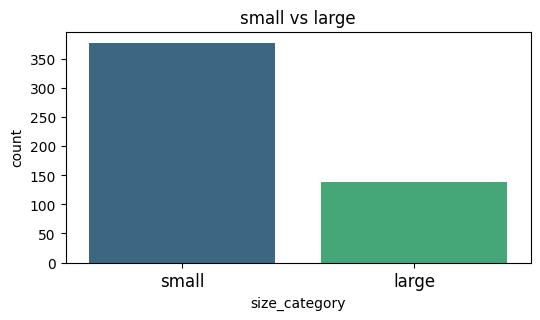

In [22]:
plt.figure(figsize=(6,3))
sns.countplot(x='size_category', data=data, palette='viridis',order=data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('small vs large')

In [23]:
corr=data1.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444,-0.024292
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779,-0.046598
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299,-0.028372
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600,0.007867
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428,-0.009976
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631,0.039730
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211,-0.059513
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319,-0.053463
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191,-0.310561
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903,0.017980


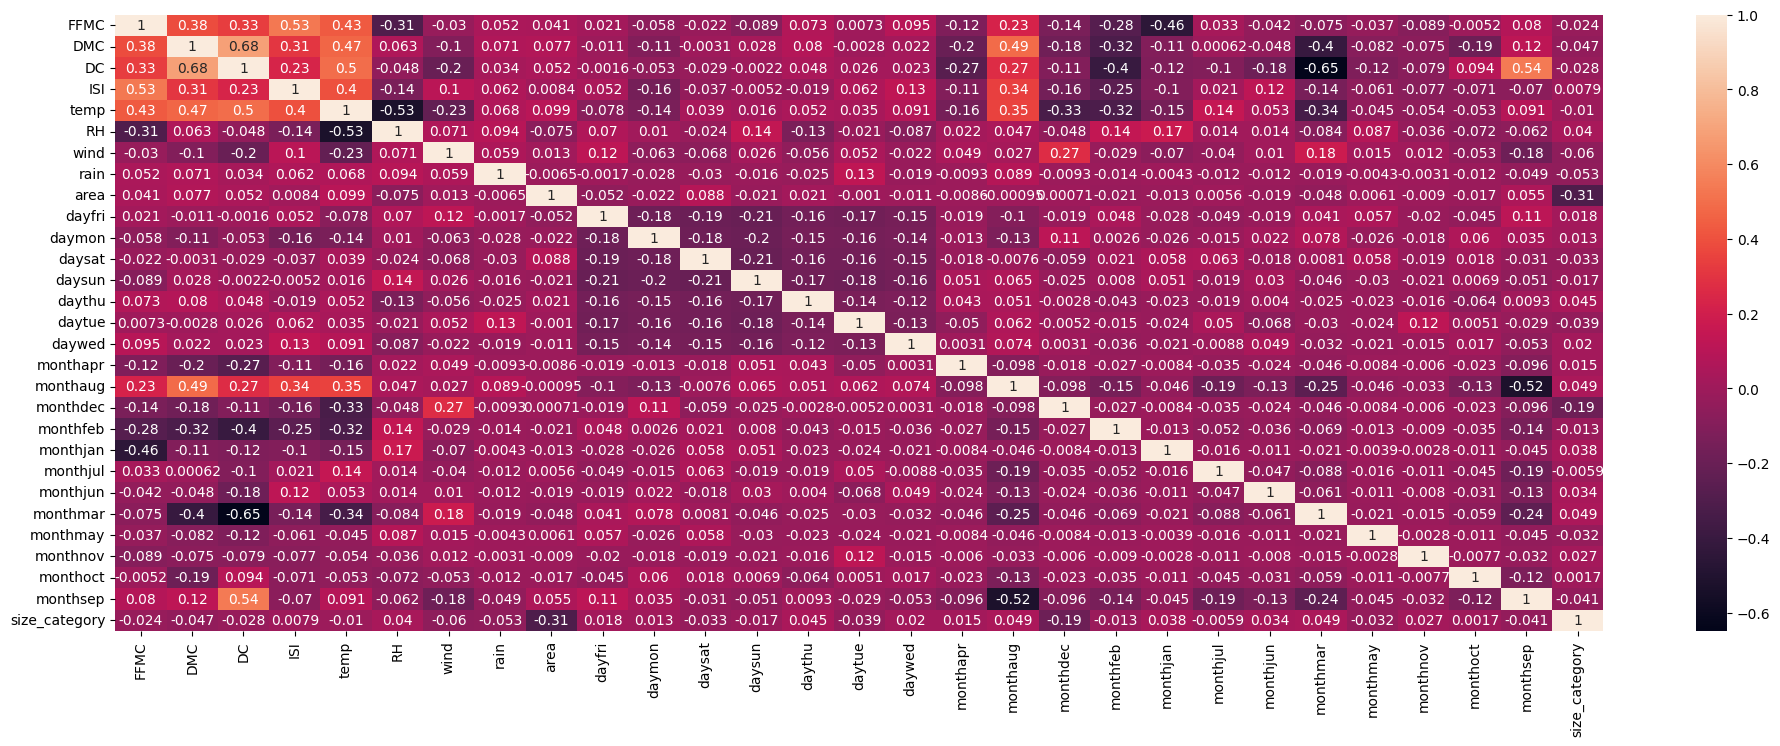

In [24]:
plt.figure(figsize=(24,8))
sns.heatmap(corr, annot=True);

In [25]:
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# train and test split

In [27]:
x = data1.drop(labels='size_category',axis = 1)
x


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y = data1[['size_category']]
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
504,0
505,0
506,0
507,1


In [30]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.30,random_state=12)

In [31]:
#Imbalanced or balanced dataset
countsizesmall = len(data1[data1.size_category == 'small'])
countsizelarge = len(data1[data1.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(data1.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(data1.size_category))*100)))

Percentage of Small Forest Fire Size: 0.00%
Percentage of Large Foreset Fire Size: 0.00%


In [32]:
#Data Is Imbalance
from imblearn.over_sampling import SMOTE

In [33]:
smote= SMOTE(random_state=12)
x_train_smote,y_train_smote= smote.fit_resample(x_train,np.array(y_train).ravel())
x_train_smote,y_train_smote

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    90.600000  269.800000  811.200000   5.500000  22.200000  45  3.600000   
 1    81.600000   56.700000  665.600000   1.900000  21.900000  71  5.800000   
 2    88.200000   96.200000  229.000000   4.700000  14.300000  79  4.000000   
 3    91.000000  129.500000  692.600000   7.000000  21.700000  38  2.200000   
 4    94.800000  222.400000  698.600000  13.900000  20.300000  42  2.700000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 513  88.895737   17.136232   37.754220   7.134868  11.527366  33  3.049872   
 514  90.210922   45.293691   94.198546   5.421116  11.421116  57  4.283981   
 515  84.401864   10.662007   27.014623   4.583262   8.214086  45  2.021613   
 516  93.533272  215.816574  709.445132   8.427788  21.385921  42  2.144424   
 517  85.400000   25.400000  349.700000   2.600000   4.600000  21  8.500000   
 
      rain        area  dayfri  ...  monthdec  mon

In [34]:
x_train=x_train_smote.copy()
y_train=y_train_smote.copy()

In [35]:
#Standardization

In [36]:
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train

array([[0.92894057, 0.93007961, 0.94787234, ..., 0.        , 0.        ,
        0.        ],
       [0.8126615 , 0.19245414, 0.77576832, ..., 0.        , 0.        ,
        0.        ],
       [0.89793282, 0.32917965, 0.25969267, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.84886129, 0.03309798, 0.02093927, ..., 0.        , 0.        ,
        0.        ],
       [0.96683814, 0.74322109, 0.82759472, ..., 0.        , 0.        ,
        0.        ],
       [0.86175711, 0.08411215, 0.40236407, ..., 0.        , 0.        ,
        0.        ]])

In [37]:
X_test = scale.fit_transform(x_test)
X_test

array([[0.94104803, 0.50745751, 0.84519761, ..., 0.        , 0.        ,
        1.        ],
       [0.93231441, 0.61533125, 0.49595403, ..., 0.        , 0.        ,
        0.        ],
       [0.86681223, 0.27714187, 0.8535241 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.96943231, 0.76101283, 0.81001525, ..., 0.        , 0.        ,
        0.        ],
       [0.88646288, 0.94797086, 0.95836754, ..., 0.        , 0.        ,
        1.        ],
       [0.88209607, 0.13492889, 0.09557875, ..., 0.        , 0.        ,
        0.        ]])

Model

Tuning of Hyperparameters :- Batch Size and Epochs

In [38]:
def creat_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [39]:
model = KerasClassifier(build_fn=creat_model,verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,50]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=5)
gsv_result = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.760 total time=   3.2s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.750 total time=   4.3s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.260 total time=   3.6s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.718 total time=   4.0s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=   4.7s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=0.654 total time=   4.9s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.663 total time=   8.0s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.663 total time=   5.0s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.864 total time=   4.9s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=0.000 total time=   2.5s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.798 total time=   4.4s
[CV 2/5] END ..........batch_size=10, epochs=50;,

[CV 4/5] END ..........batch_size=50, epochs=10;, score=0.311 total time=   1.5s


[CV 5/5] END ..........batch_size=50, epochs=10;, score=0.000 total time=   1.5s
[CV 1/5] END ..........batch_size=50, epochs=20;, score=0.260 total time=   1.8s
[CV 2/5] END ..........batch_size=50, epochs=20;, score=0.731 total time=   2.7s
[CV 3/5] END ..........batch_size=50, epochs=20;, score=0.385 total time=   2.3s
[CV 4/5] END ..........batch_size=50, epochs=20;, score=0.311 total time=   1.6s
[CV 5/5] END ..........batch_size=50, epochs=20;, score=0.000 total time=   1.6s
[CV 1/5] END ..........batch_size=50, epochs=50;, score=0.750 total time=   2.5s
[CV 2/5] END ..........batch_size=50, epochs=50;, score=0.663 total time=   2.1s
[CV 3/5] END ..........batch_size=50, epochs=50;, score=0.740 total time=   3.9s
[CV 4/5] END ..........batch_size=50, epochs=50;, score=0.835 total time=   4.3s
[CV 5/5] END ..........batch_size=50, epochs=50;, score=0.000 total time=   2.4s


In [40]:
# Summarize the results
print('Best : {}, using {}'.format(gsv_result.best_score_,gsv_result.best_params_))
means = gsv_result.cv_results_['mean_test_score']
stds = gsv_result.cv_results_['std_test_score']
params = gsv_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8284914135932923, using {'batch_size': 10, 'epochs': 50}
0.4975354731082916,0.31156811422851544 with: {'batch_size': 10, 'epochs': 10}
0.5689693927764893,0.2952546968279094 with: {'batch_size': 10, 'epochs': 20}
0.8284914135932923,0.06824020678387845 with: {'batch_size': 10, 'epochs': 50}
0.2659820795059204,0.15974341476358364 with: {'batch_size': 30, 'epochs': 10}
0.41652352213859556,0.2644550286937277 with: {'batch_size': 30, 'epochs': 20}
0.7955937266349793,0.05561200433247408 with: {'batch_size': 30, 'epochs': 50}
0.22559746503829955,0.11463062377823953 with: {'batch_size': 50, 'epochs': 10}
0.33713592290878297,0.2356147150431224 with: {'batch_size': 50, 'epochs': 20}
0.5977595329284668,0.30378028484130487 with: {'batch_size': 50, 'epochs': 50}


**Tuning of Hyperparameters**:- Learning rate and Drop out rate

In [41]:
# Defining the model

def creat_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model


In [42]:
model = KerasClassifier(build_fn=creat_model, batch_size = 10, epochs = 50, verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result_a = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.260 total time=   4.7s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.298 total time=   6.5s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.712 total time=   4.9s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.311 total time=   6.3s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   5.2s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.260 total time=   7.2s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.760 total time=   6.8s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.856 total time=   6.5s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.903 total time=   6.8s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.951 total time=   4.6s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.760 total time=   5.4s
[CV 2/5] END dropout_rate=0.0, 

In [43]:
# Summarize the results
print('Best : {}, using {}'.format(gsv_result_a.best_score_, gsv_result_a.best_params_))
means = gsv_result_a.cv_results_['mean_test_score']
stds = gsv_result_a.cv_results_['std_test_score']
params = gsv_result_a.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8169342756271363, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.31598207354545593,0.2279628997389584 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7458737790584564,0.2512522361085852 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8169342756271363,0.07229749198763026 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.47802464962005614,0.2581692211941225 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.6555638670921325,0.3247785876225797 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7091486275196075,0.2310189014966737 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.22559746503829955,0.11463062377823953 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.757505601644516,0.2581124378050214 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8090552687644958,0.04678662817899916 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}


Tuning of Hyperparameter :
Activation Function & Kernel Initializer

In [44]:
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [45]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result_b = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.779 total time=   6.3s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.298 total time=   6.3s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.779 total time=   6.3s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.883 total time=   6.3s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.922 total time=   6.3s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.846 total time=   7.3s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.750 total time=   6.8s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.788 total time=   5.5s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.311 total time=   6.6s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.922 total time=   6.3s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.808 total time=   5.4s
[CV 2/5] END Activat

In [46]:
# Summarize the results
print('Best : {}, using {}'.format(gsv_result_b.best_score_,gsv_result_b.best_params_))
means = gsv_result_b.cv_results_['mean_test_score']
stds = gsv_result_b.cv_results_['std_test_score']
params = gsv_result_b.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.840011191368103, using {'Activation_Function': 'linear', 'init': 'zero'}
0.732318890094757,0.2244344749734591 with: {'Activation_Function': 'relu', 'init': 'zero'}
0.7235250234603882,0.21443893867066838 with: {'Activation_Function': 'relu', 'init': 'uniform'}
0.8226101517677307,0.048338396131128517 with: {'Activation_Function': 'relu', 'init': 'normal'}
0.8169342756271363,0.07229749198763026 with: {'Activation_Function': 'tanh', 'init': 'zero'}
0.8265496730804444,0.06508138666918668 with: {'Activation_Function': 'tanh', 'init': 'uniform'}
0.834260630607605,0.07118725052471131 with: {'Activation_Function': 'tanh', 'init': 'normal'}
0.7187079906463623,0.21347873384307267 with: {'Activation_Function': 'softmax', 'init': 'zero'}
0.814955186843872,0.06428140349120925 with: {'Activation_Function': 'softmax', 'init': 'uniform'}
0.8227035164833069,0.0690844051960956 with: {'Activation_Function': 'softmax', 'init': 'normal'}
0.840011191368103,0.056853567021879346 with: {'Activation_Fun

Number of Neurons in activation layer

In [47]:
def creat_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


In [48]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
neuron1 = [24,16,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
gsv_result_c = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.865 total time=   6.2s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.846 total time=   4.4s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.817 total time=   4.3s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=0.883 total time=   5.1s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=0.932 total time=   6.2s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.837 total time=   6.2s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.827 total time=   6.2s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.798 total time=   7.6s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=0.893 total time=   5.2s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=0.932 total time=   5.3s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.856 total time=   6.3s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [49]:
# Summarize the results
print('Best : {}, using {}'.format(gsv_result_c.best_score_,gsv_result_c.best_params_))
means = gsv_result_c.cv_results_['mean_test_score']
stds = gsv_result_c.cv_results_['std_test_score']
params = gsv_result_c.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8708737850189209, using {'neuron1': 16, 'neuron2': 4}
0.868876039981842,0.03844746637326172 with: {'neuron1': 24, 'neuron2': 12}
0.8573562264442444,0.048448195767429994 with: {'neuron1': 24, 'neuron2': 8}
0.8669716119766235,0.041085399485427346 with: {'neuron1': 24, 'neuron2': 4}
0.8592793107032776,0.046989228276108866 with: {'neuron1': 16, 'neuron2': 12}
0.8612210631370545,0.05039569559611489 with: {'neuron1': 16, 'neuron2': 8}
0.8708737850189209,0.04778713693484873 with: {'neuron1': 16, 'neuron2': 4}
0.8573562264442444,0.04767875102726055 with: {'neuron1': 8, 'neuron2': 12}
0.8669529557228088,0.038812745354955554 with: {'neuron1': 8, 'neuron2': 8}
0.8612210512161255,0.04893548948264619 with: {'neuron1': 8, 'neuron2': 4}


Train a model with optimum values of hyperparameter

In [50]:
def creat_model():
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [51]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50)
model.fit(X_train,y_train)

Epoch 1/50
52/52 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5792
Epoch 3/50
52/52 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6467
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.6776
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.7239
Epoch 6/50
52/52 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7587
Epoch 7/50
52/52 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7954
Epoch 8/50
52/52 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.8050
Epoch 9/50
52/52 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.8050
Epoch 10/50
52/52 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8108
Epoch 11/50
52/52 [

In [52]:
y_predict = model.predict(X_train)

17/17 [==============================] - 0s 2ms/step


In [53]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       259
           1       0.85      0.99      0.92       259

    accuracy                           0.91       518
   macro avg       0.92      0.91      0.91       518
weighted avg       0.92      0.91      0.91       518



In [54]:
accuracy_score(y_train,y_predict)

0.9092664092664092

In [55]:
confusion_matrix(y_train,y_predict)

array([[214,  45],
       [  2, 257]])

In [56]:
# testing data

In [57]:
y_test_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [58]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.98      0.75        41
           1       0.99      0.78      0.87       112

    accuracy                           0.83       153
   macro avg       0.80      0.88      0.81       153
weighted avg       0.89      0.83      0.84       153



In [59]:
accuracy_score(y_test,y_test_pred)

0.8300653594771242

In [62]:
confusion_matrix(y_test,y_test_pred)

array([[40,  1],
       [25, 87]])